In [7]:
import csv
import numpy as np
import math as mp
import cmath as cm
from scipy.optimize import fsolve, root, fmin

import matplotlib as mpl
import matplotlib.pyplot as plt

def bestSaveFig(name):
    plt.savefig(name, bbox_inches = 'tight', pad_inches = 0.1, dpi = 500)
    
def dataGet(stFN):
    boi = csv.reader(open(stFN, "r"), delimiter=',')
    
    dep = []
    real = []
    imag = []
    mag = []
    for row in boi:
        dep.append(float(row[0]))
        real.append(float(row[1]))
        imag.append(float(row[2]))
        mag.append(float(row[3]))
        
    return([dep, real, imag, mag])

def sweepConsol_nstFSv02(sweepSet):
    freq = []
    realSig = []
    imagSig = []
    
    for sweep in sweepSet:
        fn_freq1 = "FrequencySweep_"+str(sweep)+".csv"

        data_freq1 = dataGet(fn_freq1)
        freq = np.concatenate((freq, data_freq1[0]))
        realSig = np.concatenate((realSig, data_freq1[1]))
        imagSig = np.concatenate((imagSig, data_freq1[2]))
    
    return(freq, realSig, imagSig)

def sweepSig_nstFSv02(sweepSet):
    freq, realSig, imagSig = sweepConsol_nstFSv02(sweepSet)
    magSig = np.sqrt(np.add(np.square(realSig), np.square(imagSig)))
    
    return(freq, realSig, imagSig, magSig)
    

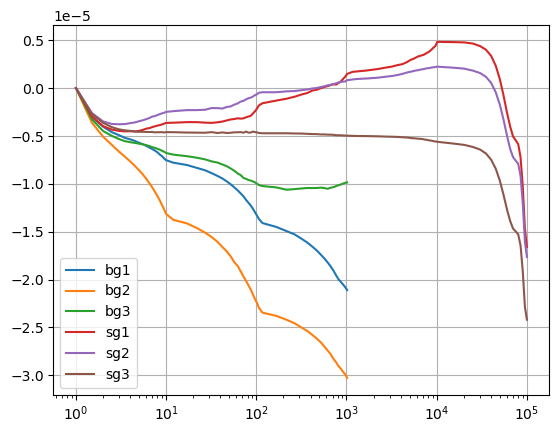

In [21]:
#----------

bg_1 = [6010, 6011, 6012]
bg_2 = [6013, 6014, 6015]
bg_3 = [6016, 6017, 6018]

sg_1 = [6019, 6020, 6021, 6022, 6023]
sg_2 = [6024, 6025, 6026, 6027, 6028]
sg_3 = [6029, 6030, 6031, 6032, 6033]

#----------

freq, realSig, imagSig, magSig = sweepSig_nstFSv02(bg_1)
plt.plot(freq, np.subtract(realSig, realSig[0]), label = "bg1")

freq, realSig, imagSig, magSig = sweepSig_nstFSv02(bg_2)
plt.plot(freq, np.subtract(realSig, realSig[0]), label = "bg2")

freq, realSig, imagSig, magSig = sweepSig_nstFSv02(bg_3)
plt.plot(freq, np.subtract(realSig, realSig[0]), label = "bg3")

freq, realSig, imagSig, magSig = sweepSig_nstFSv02(sg_1)
plt.plot(freq, np.subtract(realSig, realSig[0]), label = "sg1")

freq, realSig, imagSig, magSig = sweepSig_nstFSv02(sg_2)
plt.plot(freq, np.subtract(realSig, realSig[0]), label = "sg2")

freq, realSig, imagSig, magSig = sweepSig_nstFSv02(sg_3)
plt.plot(freq, np.subtract(realSig, realSig[0]), label = "sg3")

plt.xscale("log")
plt.legend()
plt.grid()
plt.show()

#----------